In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

In [27]:
dfann = pd.read_csv('Labeling_ANN_benar.csv')
dfann

,Unnamed: 0,from,Ingredient1_x,to,Ingredient2_x,similarity_x,LabelingANN,URIFrom,Ingredient1_y,URITo,Ingredient2_y,similarity_y,Labeling,TrueFalse
0,0,dua kelinci kacang sangrai,gula,indomaret kacang bali,garam,1.000000,1,http://halal.addi.is.its.ac.id/foodproducts/Du...,gula,http://halal.addi.is.its.ac.id/foodproducts/In...,garam,1.000000,1,1
1,1,ensure vanilla,vitamin,ensure nutrition powder fos vanila,vitamin,1.000000,1,http://halal.addi.is.its.ac.id/foodproducts/En...,vitamin,http://halal.addi.is.its.ac.id/foodproducts/En...,vitamin,1.000000,1,1
2,2,Sarimi Goreng Rasa Ayam Kremes Isi 2,Chili Powder,Sarimi Goreng Rasa Ayam Kecap Isi 2,Vegetable Oil,1.000000,1,http://halal.addi.is.its.ac.id/foodproducts/Sa...,Chili Powder,http://halal.addi.is.its.ac.id/foodproducts/Sa...,Vegetable Oil,1.000000,1,1
3,3,gery wafer roll chocolatos dark,perisa sintetik,chocolatos wafer roll dark,perisa sintetik,1.000000,1,http://halal.addi.is.its.ac.id/foodproducts/Ge...,perisa sintetik,http://halal.addi.is.its.ac.id/foodproducts/Ch...,perisa sintetik,1.000000,1,1
4,4,regal marie,soda kue,regal marie special,soda kue,1.000000,1,http://halal.addi.is.its.ac.id/foodproducts/Re...,soda kue,http://halal.addi.is.its.ac.id/foodproducts/Re...,soda kue,1.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504371,504371,pringles potato crisps hot & spicy,aspartam,nissin mie goreng gekikara ramen pedas,kriuk bawang,0.017857,0,http://halal.addi.is.its.ac.id/foodproducts/Pr...,aspartam,http://halal.addi.is.its.ac.id/foodproducts/Ni...,kriuk bawang,0.017857,0,0
504372,504372,pringles potato crisps hot & spicy,aspartam,indomie mi instan ayam bawang,bawang merah,0.017857,0,http://halal.addi.is.its.ac.id/foodproducts/Pr...,aspartam,http://halal.addi.is.its.ac.id/foodproducts/In...,bawang merah,0.017857,0,0
504373,504373,indomie mi instan ayam bawang,bawang merah,pringles potato crisps hot & spicy,aspartam,0.017857,0,http://halal.addi.is.its.ac.id/foodproducts/In...,bawang merah,http://halal.addi.is.its.ac.id/foodproducts/Pr...,aspartam,0.017857,0,0
504374,504374,pringles potato crisps hot & spicy,aspartam,indomie mi instan soto mie,minyak sayur,0.017241,0,http://halal.addi.is.its.ac.id/foodproducts/Pr...,aspartam,http://halal.addi.is.its.ac.id/foodproducts/In...,minyak sayur,0.017241,0,0


In [28]:
dfann['LabelingJaccard'] = np.where(dfann['similarity_y'] >= 0.42, 1, 0)

In [29]:
#index_names = dfann[ dfann['similarity_y'] >= 0.4 ].index
#dfann.drop(index_names, inplace = True)
#dfann

In [30]:
X_ANN = pd.to_numeric(dfann['LabelingANN'], downcast="float")
y = pd.to_numeric(dfann['Labeling'], downcast="float")
X_Jaccard = dfann['LabelingJaccard']

In [31]:
#X = X.values.reshape(-1,1)

In [32]:
#over = SMOTE(sampling_strategy=0.005)
#under = RandomUnderSampler(sampling_strategy=1)
#steps = [('o', over), ('u', under)]
#pipeline = Pipeline(steps=steps)

In [33]:
#X, y = pipeline.fit_resample(X, y)

In [34]:
#counter = Counter(y)
#print(counter)

In [35]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

In [36]:
#X_train= X_train.values.reshape(-1,1)

In [37]:
#X_test= X_test.values.reshape(-1,1)

In [38]:
#log_regression = LogisticRegression()

In [39]:
#log_regression.fit(X_train,y_train)

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

In [41]:
ann_auc = roc_auc_score(X_ANN,  y)
j_auc = roc_auc_score(X_Jaccard,  y)

# ROC

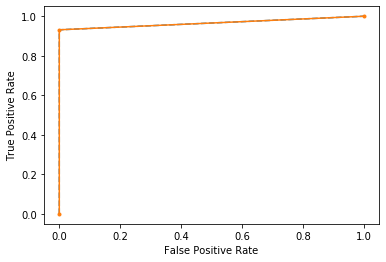

In [42]:
#define metrics
#y_pred_proba = log_regression.predict_proba(X)[::,1]
ann_fpr, ann_tpr, _ = metrics.roc_curve(X_ANN,  y)
j_fpr, j_tpr, _ = metrics.roc_curve(X_Jaccard,  y)

#create ROC curve
plt.plot(ann_fpr,ann_tpr, linestyle='--', label='ANN (AUROC = %0.3f)' % ann_auc)
plt.plot(j_fpr, j_tpr, marker='.', label='Jaccard (AUROC = %0.3f)' % j_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC

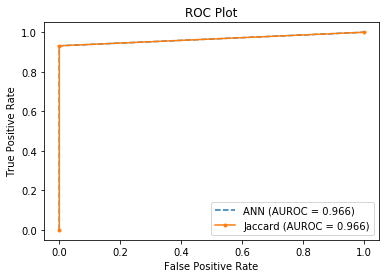

In [43]:
#define metrics
#y_pred_proba = log_regression.predict_proba(X_test)[::,1]
ann_fpr, ann_tpr, _ = metrics.roc_curve(X_ANN,  y)
j_fpr, j_tpr, _ = metrics.roc_curve(X_Jaccard,  y)

#auc = metrics.roc_auc_score(X,  y)
plt.title('ROC Plot')

#create ROC curve
plt.plot(ann_fpr,ann_tpr, linestyle='--', label='ANN (AUROC = %0.3f)' % ann_auc)
plt.plot(j_fpr, j_tpr, marker='.', label='Jaccard (AUROC = %0.3f)' % j_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [44]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(X_ANN,y)
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity

0.9314685314685315

In [45]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(X_Jaccard,y)
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity

0.9314685314685315

In [46]:
print("Accuracy:",metrics.accuracy_score(X_ANN,y))
print("F1 Score",metrics.f1_score(X_ANN,y))
print("Precision",metrics.precision_score(X_ANN,y))
print("Recall",metrics.recall_score(X_ANN,y))

Accuracy: 0.999805700509144
F1 Score 0.9645184648805213
Precision 1.0
Recall 0.9314685314685315


In [47]:
print("Accuracy:",metrics.accuracy_score(X_Jaccard,y))
print("F1 Score",metrics.f1_score(X_Jaccard,y))
print("Precision",metrics.precision_score(X_Jaccard,y))
print("Recall",metrics.recall_score(X_Jaccard,y))

Accuracy: 0.999805700509144
F1 Score 0.9645184648805213
Precision 1.0
Recall 0.9314685314685315


In [48]:
from sklearn.metrics import mean_squared_error
import math

rms = mean_squared_error(X_ANN, y, squared=False)
rms

0.013939135

In [49]:
from sklearn.metrics import mean_squared_error
import math

rms = mean_squared_error(X_Jaccard, y, squared=False)
rms

0.013939135226262354

In [50]:
MSE = np.square(np.subtract(X_ANN,y)).mean() 

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.01393913504790292


In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

In [133]:
X = X.values.reshape(-1,1)

NameError: name 'X' is not defined

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

NameError: name 'X' is not defined

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [136]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

NameError: name 'X_train' is not defined

In [68]:
nb_probs = nb.predict_proba(X_test)

NameError: name 'X_test' is not defined

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score

In [70]:
nb_auc = roc_auc_score(Y_test, nb_probs)

NameError: name 'Y_test' is not defined